# Workshop : Simple Moving Average Cross Over

## ดึงราคา Bitcoin ตั้งแต่วันที่ 1/1/2021 ถึง 1/1/2022 และสร้าง SMA สองเส้นตัดกัน(SMA12 และ เส้นSMA26) เมื่อเส้นเร็ว SMA12 ตัดขึ้นให้ทำการแสดงสัญญาณซื้อ และหากเส้น SMA26 ตัดลงให้แสดงสัญญาณขาย

In [1]:
!pip install yfinance
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 800 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 73 kB 787 kB/s 


In [2]:
import pandas as pd
import yfinance as yf
import mplfinance as mpf
import matplotlib.pyplot as plt

# ดึงข้อมูลราคา Bitcoin

In [13]:
start = '2021-01-01'

end = '2022-12-01'

In [14]:
data = yf.download('BTC-USD', start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [15]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782
...,...,...,...,...,...,...
2022-11-26,16521.576172,16666.863281,16416.228516,16464.281250,16464.281250,18000008764
2022-11-27,16463.882812,16594.406250,16437.025391,16444.626953,16444.626953,20443898509
2022-11-28,16440.222656,16482.933594,16054.530273,16217.322266,16217.322266,27743025156


In [16]:
df = data.copy()

# สร้างเส้น MA12 MA26 ใช้ Function rolling

In [17]:
df['sma_short'] = df.Close.rolling(12).mean()
df['sma_long'] = df.Close.rolling(26).mean()

# addplot สองเส้นให้เป้นเส้นสีส้มและเส้นยาวสีเหลือง

In [18]:
sma_short = mpf.make_addplot(df['sma_short'], color='orange')
sma_long = mpf.make_addplot(df['sma_long'], color='y')

# สร้าง list เป็น เส้น 12 และ 26

In [19]:
sma_list = [sma_short, sma_long]

# Plot กราฟ

/usr/local/lib/python3.8/dist-packages/mplfinance/_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


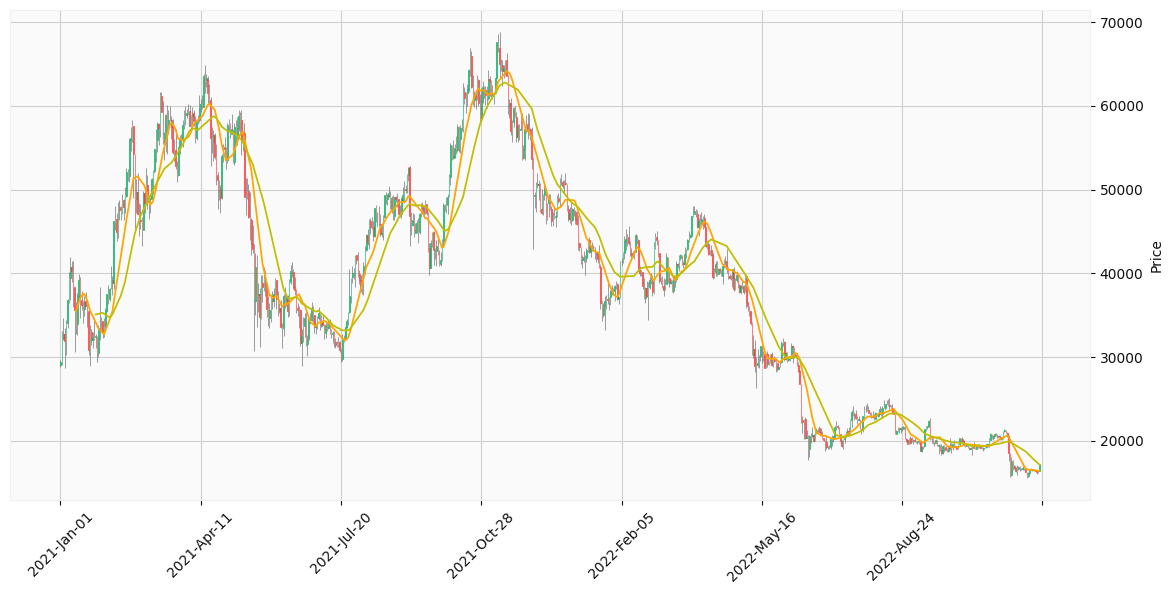

In [20]:
mpf.plot(df,style='yahoo', type='candle', addplot = sma_list, figsize=(15,7))

In [21]:
df

,Open,High,Low,Close,Adj Close,Volume,sma_short,sma_long
Date,,,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,NaN,NaN
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765,NaN,NaN
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,NaN,NaN
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344,NaN,NaN
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-11-26,16521.576172,16666.863281,16416.228516,16464.281250,16464.281250,18000008764,16510.089600,17759.574294
2022-11-27,16463.882812,16594.406250,16437.025391,16444.626953,16444.626953,20443898509,16473.424072,17604.164814
2022-11-28,16440.222656,16482.933594,16054.530273,16217.322266,16217.322266,27743025156,16435.747640,17452.542443


# สร้าง condition เพื่อให้ส่งคำสั่งโดย เมื่อเส้นสั้นมีค่ามากกว่าเส้นยาวให้ทำการซื้อ โดยเราจะสร้างตัวแปรที่เรียกว่า trend ขึ้นมาก่อน แล้วเช็คว่า sma เส้นสั้นมีค่ามากกว่า sma เส้นยาวหรือไม่

In [22]:
df['trend'] = df['sma_short'] > df['sma_long']

In [23]:
df

,Open,High,Low,Close,Adj Close,Volume,sma_short,sma_long,trend
Date,,,,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,NaN,NaN,False
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765,NaN,NaN,False
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,NaN,NaN,False
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344,NaN,NaN,False
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...
2022-11-26,16521.576172,16666.863281,16416.228516,16464.281250,16464.281250,18000008764,16510.089600,17759.574294,False
2022-11-27,16463.882812,16594.406250,16437.025391,16444.626953,16444.626953,20443898509,16473.424072,17604.164814,False
2022-11-28,16440.222656,16482.933594,16054.530273,16217.322266,16217.322266,27743025156,16435.747640,17452.542443,False


# ทำการ shift ไป 1 ค่าเพื่อเช็คว่าแท่งของวันต่อไปตรงกันหรือไม่หากไม่ตรงก็ให้ Action ในวันนั้น เพื่อบอกว่าให้ซื้อหรือขาย

In [26]:
df['trend_shift'] = df.trend.shift(1)

In [27]:
df

,Open,High,Low,Close,Adj Close,Volume,sma_short,sma_long,trend,trend_shift
Date,,,,,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,NaN,NaN,False,NaN
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765,NaN,NaN,False,False
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,NaN,NaN,False,False
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344,NaN,NaN,False,False
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...
2022-11-26,16521.576172,16666.863281,16416.228516,16464.281250,16464.281250,18000008764,16510.089600,17759.574294,False,False
2022-11-27,16463.882812,16594.406250,16437.025391,16444.626953,16444.626953,20443898509,16473.424072,17604.164814,False,False
2022-11-28,16440.222656,16482.933594,16054.530273,16217.322266,16217.322266,27743025156,16435.747640,17452.542443,False,False


# หาก trend มีค่าเป็น true และ shift trend มีค่าเป็น fasle ให้ action buy กลับกัน หาก trend มีค่าเป็น false และ shift trend มีค่าเป็น true ให้ action sell

In [28]:
df.loc[(df.trend == True) & (df.trend_shift == False),'action'] = 'buy'
df.loc[(df.trend == False) & (df.trend_shift == True),'action'] = 'sell'

In [29]:
df

,Open,High,Low,Close,Adj Close,Volume,sma_short,sma_long,trend,trend_shift,action
Date,,,,,,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,NaN,NaN,False,NaN,NaN
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765,NaN,NaN,False,False,NaN
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,NaN,NaN,False,False,NaN
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344,NaN,NaN,False,False,NaN
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,NaN,NaN,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-11-26,16521.576172,16666.863281,16416.228516,16464.281250,16464.281250,18000008764,16510.089600,17759.574294,False,False,NaN
2022-11-27,16463.882812,16594.406250,16437.025391,16444.626953,16444.626953,20443898509,16473.424072,17604.164814,False,False,NaN
2022-11-28,16440.222656,16482.933594,16054.530273,16217.322266,16217.322266,27743025156,16435.747640,17452.542443,False,False,NaN


In [30]:
df[df.action=='buy']

,Open,High,Low,Close,Adj Close,Volume,sma_short,sma_long,trend,trend_shift,action
Date,,,,,,,,,,,
2021-02-06,38138.386719,40846.546875,38138.386719,39266.011719,39266.011719,71326033653,34918.725423,34886.486253,True,False,buy
2021-03-11,55963.179688,58091.062500,54484.593750,57805.121094,57805.121094,56772343595,51014.841797,50913.687200,True,False,buy
2021-04-05,58760.875000,59891.296875,57694.824219,59057.878906,59057.878906,60706272115,57354.408203,57292.442458,True,False,buy
2021-05-09,58877.390625,59210.882812,56482.003906,58232.316406,58232.316406,65906690347,56611.330729,56203.914363,True,False,buy
2021-06-17,38341.421875,39513.671875,37439.675781,38053.503906,38053.503906,37096670047,37162.793620,37107.821815,True,False,buy
2021-07-28,39503.187500,40816.070312,38862.437500,39995.906250,39995.906250,38702404695,34028.618652,33709.802284,True,False,buy
2021-10-06,51486.664062,55568.464844,50488.191406,55361.449219,55361.449219,49034730168,46214.017578,45826.967097,True,False,buy
2021-12-29,47623.871094,48119.742188,46201.496094,46444.710938,46444.710938,30049226299,48793.440755,48706.500901,True,False,buy
2022-02-08,43854.652344,45293.867188,42807.835938,44118.445312,44118.445312,33079398868,39873.941732,39626.625601,True,False,buy


# การ Mark Ticker ของลูกศรที่บอกสัญญาณซื้อขาย หาก buy ให้ Mark ต่ำกว่าที่ 0.95 หาก Sell ให้ Mark ที่สูงกว่า 1.05

In [31]:
df.loc[df['action'] == 'buy', 'marker_position'] = df['Low'] *0.95
df.loc[df['action'] == 'sell', 'marker_position'] = df['High'] *1.05

In [32]:
df[df.marker_position.notnull()]

,Open,High,Low,Close,Adj Close,Volume,sma_short,sma_long,trend,trend_shift,action,marker_position
Date,,,,,,,,,,,,
2021-02-06,38138.386719,40846.546875,38138.386719,39266.011719,39266.011719,71326033653,34918.725423,34886.486253,True,False,buy,36231.467383
2021-03-05,48527.031250,49396.429688,46542.515625,48927.304688,48927.304688,48625928883,48627.821615,49341.074369,False,True,sell,51866.251172
2021-03-11,55963.179688,58091.062500,54484.593750,57805.121094,57805.121094,56772343595,51014.841797,50913.687200,True,False,buy,51760.364062
2021-03-31,58930.277344,59930.027344,57726.417969,58918.832031,58918.832031,65520826225,56019.322917,56111.589393,False,True,sell,62926.528711
2021-04-05,58760.875000,59891.296875,57694.824219,59057.878906,59057.878906,60706272115,57354.408203,57292.442458,True,False,buy,54810.083008
2021-04-23,51739.808594,52120.792969,47714.664062,51093.652344,51093.652344,86668667320,58104.393555,58367.243990,False,True,sell,54726.832617
2021-05-09,58877.390625,59210.882812,56482.003906,58232.316406,58232.316406,65906690347,56611.330729,56203.914363,True,False,buy,53657.903711
2021-05-15,49855.496094,50639.664062,46664.140625,46760.187500,46760.187500,59161047474,54134.864909,54182.801082,False,True,sell,53171.647266
2021-06-17,38341.421875,39513.671875,37439.675781,38053.503906,38053.503906,37096670047,37162.793620,37107.821815,True,False,buy,35567.691992


# เลือกว่า buy หรือ Sell

In [33]:
#buy action dataframe
a = df.loc[df.action == 'buy']

#sell action dataframe
b = df.loc[df.action == 'sell']

In [34]:
a

,Open,High,Low,Close,Adj Close,Volume,sma_short,sma_long,trend,trend_shift,action,marker_position
Date,,,,,,,,,,,,
2021-02-06,38138.386719,40846.546875,38138.386719,39266.011719,39266.011719,71326033653,34918.725423,34886.486253,True,False,buy,36231.467383
2021-03-11,55963.179688,58091.062500,54484.593750,57805.121094,57805.121094,56772343595,51014.841797,50913.687200,True,False,buy,51760.364062
2021-04-05,58760.875000,59891.296875,57694.824219,59057.878906,59057.878906,60706272115,57354.408203,57292.442458,True,False,buy,54810.083008
2021-05-09,58877.390625,59210.882812,56482.003906,58232.316406,58232.316406,65906690347,56611.330729,56203.914363,True,False,buy,53657.903711
2021-06-17,38341.421875,39513.671875,37439.675781,38053.503906,38053.503906,37096670047,37162.793620,37107.821815,True,False,buy,35567.691992
2021-07-28,39503.187500,40816.070312,38862.437500,39995.906250,39995.906250,38702404695,34028.618652,33709.802284,True,False,buy,36919.315625
2021-10-06,51486.664062,55568.464844,50488.191406,55361.449219,55361.449219,49034730168,46214.017578,45826.967097,True,False,buy,47963.781836
2021-12-29,47623.871094,48119.742188,46201.496094,46444.710938,46444.710938,30049226299,48793.440755,48706.500901,True,False,buy,43891.421289
2022-02-08,43854.652344,45293.867188,42807.835938,44118.445312,44118.445312,33079398868,39873.941732,39626.625601,True,False,buy,40667.444141


In [35]:
b

,Open,High,Low,Close,Adj Close,Volume,sma_short,sma_long,trend,trend_shift,action,marker_position
Date,,,,,,,,,,,,
2021-03-05,48527.031250,49396.429688,46542.515625,48927.304688,48927.304688,48625928883,48627.821615,49341.074369,False,True,sell,51866.251172
2021-03-31,58930.277344,59930.027344,57726.417969,58918.832031,58918.832031,65520826225,56019.322917,56111.589393,False,True,sell,62926.528711
2021-04-23,51739.808594,52120.792969,47714.664062,51093.652344,51093.652344,86668667320,58104.393555,58367.243990,False,True,sell,54726.832617
2021-05-15,49855.496094,50639.664062,46664.140625,46760.187500,46760.187500,59161047474,54134.864909,54182.801082,False,True,sell,53171.647266
2021-06-24,33682.800781,35228.851562,32385.214844,34662.437500,34662.437500,33123368116,36316.033691,36328.806716,False,True,sell,36990.294141
2021-09-13,46057.214844,46598.679688,43591.320312,44963.074219,44963.074219,40969943253,47840.860026,48130.349760,False,True,sell,48928.613672
2021-11-21,59730.507812,60004.425781,58618.929688,58730.476562,58730.476562,26123447605,61801.167969,62127.929988,False,True,sell,63004.647070
2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906,43569.003906,36851084859,47529.554688,47905.301382,False,True,sell,49275.499219
2022-02-23,38285.281250,39122.394531,37201.816406,37296.570312,37296.570312,21849073843,40612.197266,40706.199369,False,True,sell,41078.514258


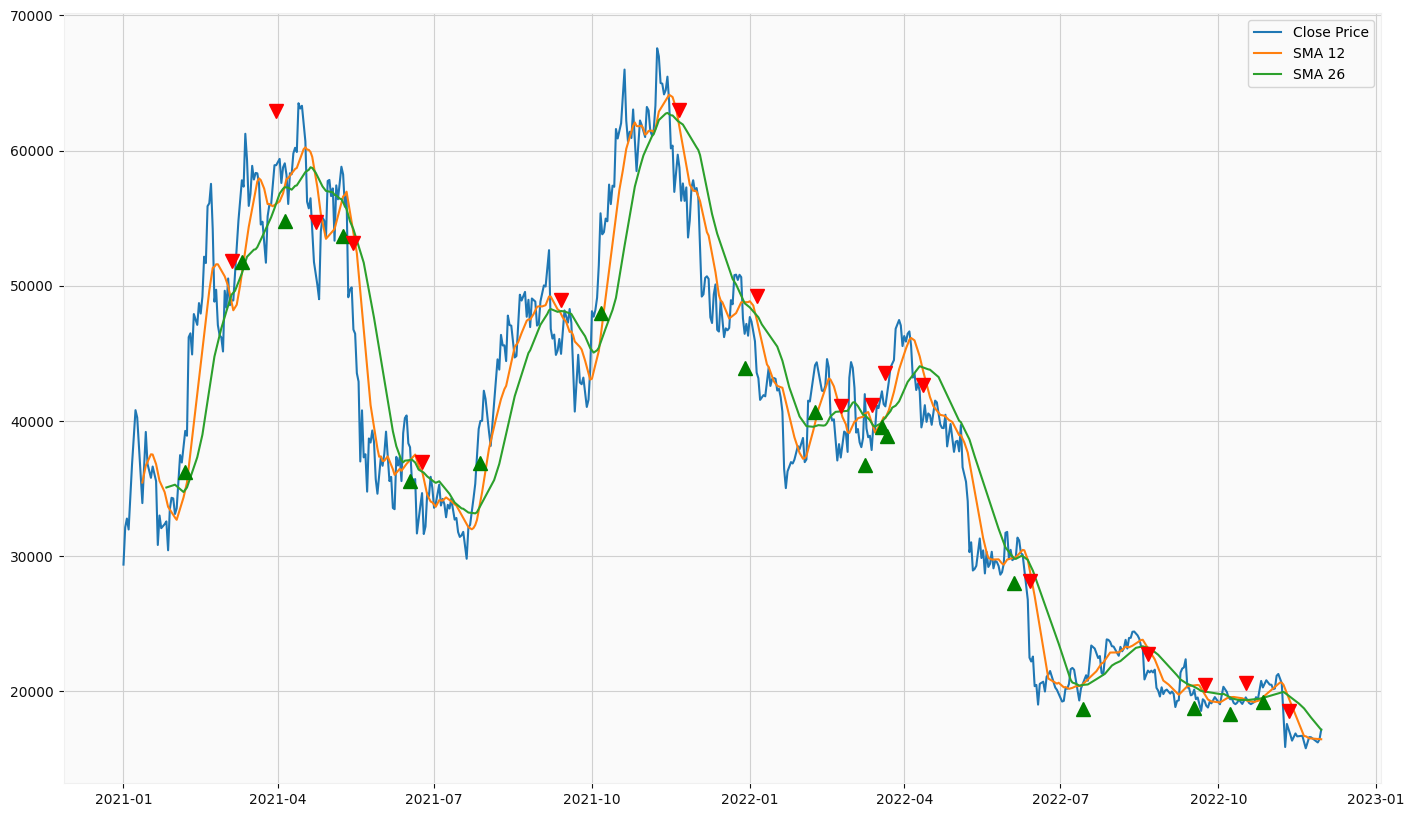

In [36]:
plt.figure(figsize=(17,10))
plt.plot(df.Close, label='Close Price')
plt.plot(df.sma_short, label='SMA 12')
plt.plot(df.sma_long, label='SMA 26')
plt.plot(a.marker_position, 'g^', markersize=10)
plt.plot(b.marker_position, 'rv', markersize=10)
plt.legend()
